<a href="https://colab.research.google.com/github/umharshitha5/loan-approval-prediction-analysis/blob/main/loan_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importings all the python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
loan= pd.read_csv('/content/drive/MyDrive/loan prediction dataset.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
loan.shape

(614, 13)

In [7]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

###Checking outliers

<Axes: >

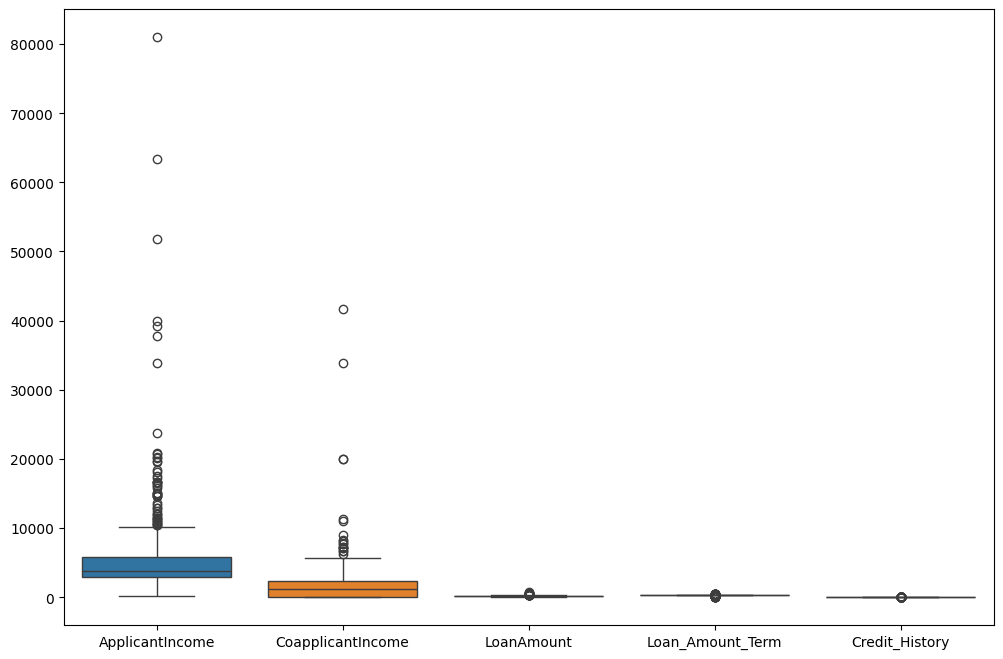

In [10]:

plt.figure(figsize=(12,8))
sns.boxplot(data = loan)

###Filling the null values of numerical data type

In [11]:
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].median())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mean())

###Fill the null values of object data type

In [12]:
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married'] = loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].mode()[0])

In [13]:
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])

In [14]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###Number of people who loan by gender

Number of people who took loan by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

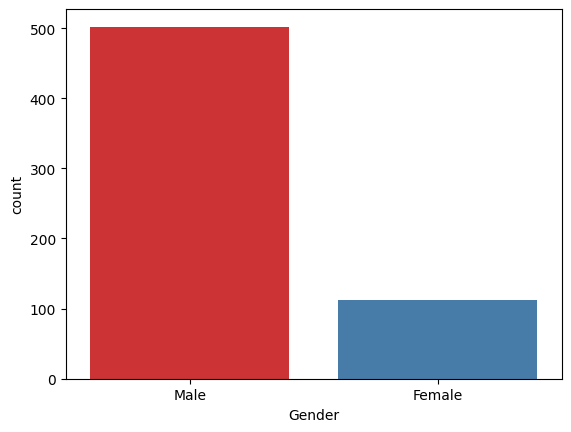

In [15]:
print('Number of people who took loan by gender')
print(loan['Gender'].value_counts())
sns.countplot(x='Gender',data = loan, palette='Set1')

###Number of people who took loan by there marital status

Number of people who took loan by Married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

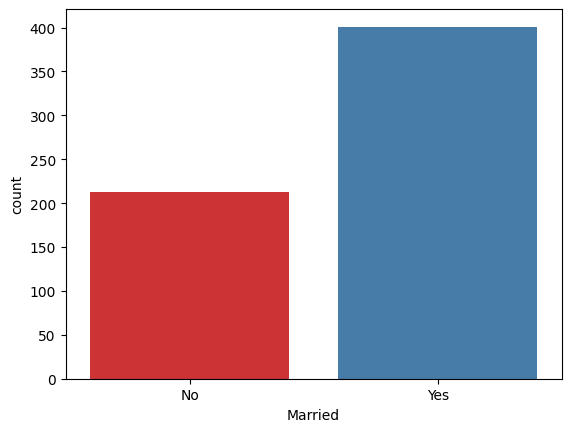

In [16]:
print('Number of people who took loan by Married')
print(loan['Married'].value_counts())
sns.countplot(x='Married',data = loan, palette='Set1')

###Number of people took loan based on there Education

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

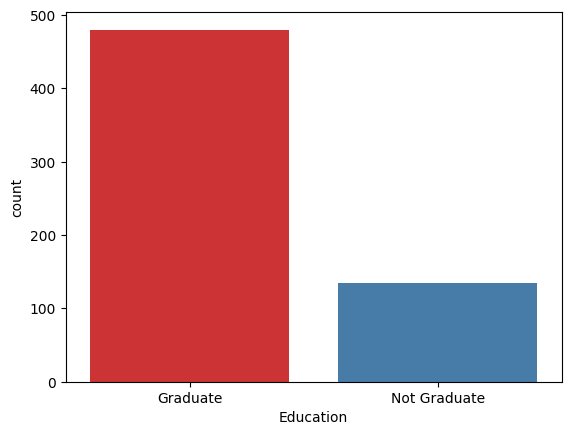

In [17]:
print('Number of people who took loan by Education')
print(loan['Education'].value_counts())
sns.countplot(x='Education',data = loan, palette='Set1')

### Checking the correlation

<Axes: >

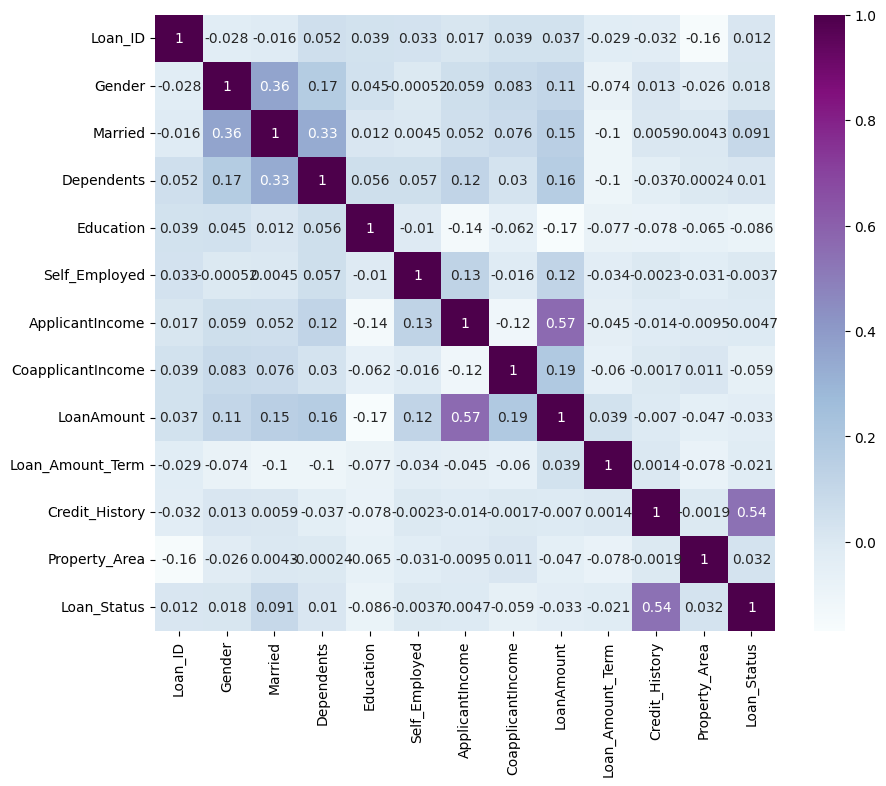

In [18]:
loan1=loan.copy()
loan1['Loan_ID']=loan1['Loan_ID'].astype('category').cat.codes
loan1['Education']=loan1['Education'].astype('category').cat.codes
loan1['Gender']=loan1['Gender'].astype('category').cat.codes
loan1['Married']=loan1['Married'].astype('category').cat.codes
loan1['Dependents']=loan1['Dependents'].astype('category').cat.codes
loan1['Self_Employed']=loan1['Self_Employed'].astype('category').cat.codes
loan1['Property_Area']=loan1['Property_Area'].astype('category').cat.codes
loan1['Loan_Status']=loan1['Loan_Status'].astype('category').cat.codes


corr = loan1.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True, cmap ='BuPu')

In [19]:
corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.036872,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.036872,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.039235,-0.007031,-0.046632,-0.033214
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.039235,1.000000,0.001395,-0.077620,-0.020974


In [20]:
loan['Total_Income'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

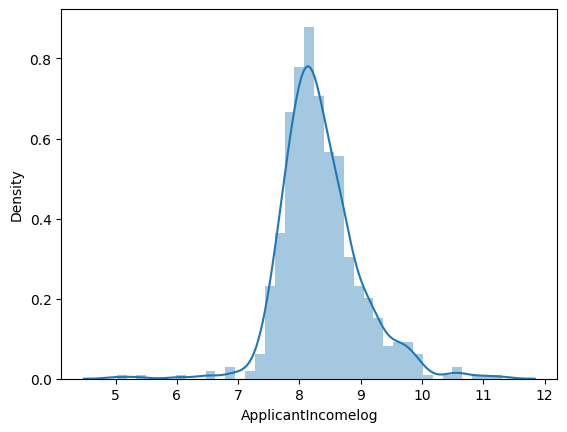

In [21]:
loan['ApplicantIncomelog'] = np.log(loan['ApplicantIncome'] + 1)
sns.distplot(loan['ApplicantIncomelog'])

In [22]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

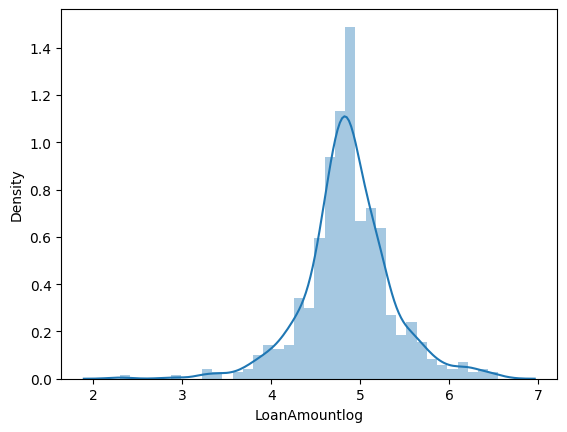

In [23]:
loan['LoanAmountlog'] = np.log(loan['LoanAmount'] + 1)
sns.distplot(loan['LoanAmountlog'])

<Axes: xlabel='Loan_Amount_Term_log', ylabel='Density'>

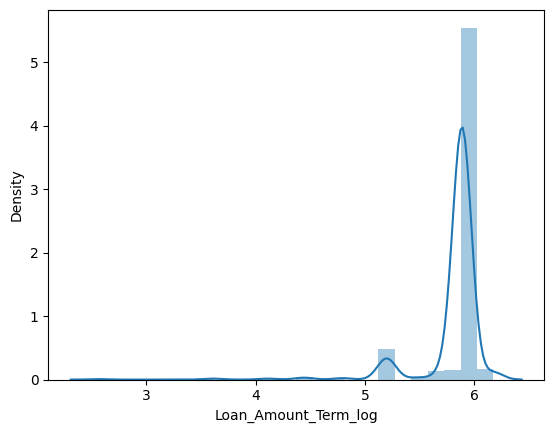

In [24]:
loan['Loan_Amount_Term_log'] = np.log(loan['Loan_Amount_Term'] + 1)
sns.distplot(loan['Loan_Amount_Term_log'])

<Axes: xlabel='Total_Income_log', ylabel='Density'>

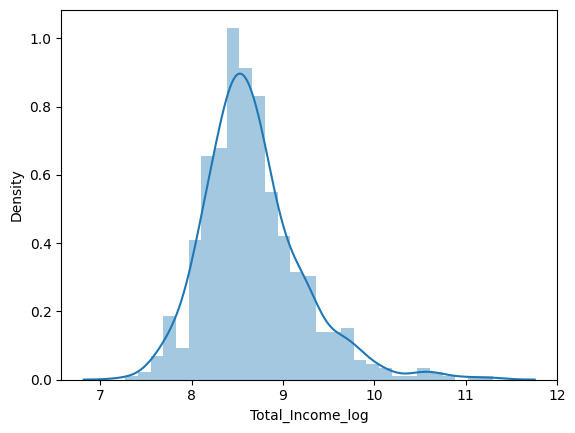

In [25]:
loan['Total_Income_log'] = np.log(loan['Total_Income'] + 1)
sns.distplot(loan['Total_Income_log'])

In [26]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


###Drop unnecessary columns

In [27]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
loan = loan.drop(columns = cols, axis = 1)
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [28]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Dependents','Self_Employed','Property_Area','Loan_Status']
le =  LabelEncoder()
for col in cols:
  loan[col] =  le.fit_transform(loan[col])

In [29]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [30]:
loan.dtypes

Gender                    int64
Married                   int64
Dependents                int64
Education                 int64
Self_Employed             int64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
ApplicantIncomelog      float64
LoanAmountlog           float64
Loan_Amount_Term_log    float64
Total_Income_log        float64
dtype: object

In [31]:
X = loan.drop(columns = ['Loan_Status'],axis = 1)
y = loan['Loan_Status']

In [32]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [33]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

###importing machine learning libraries

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [36]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred_model1 = model1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model1)

In [37]:
accuracy*100

77.27272727272727

In [38]:
## Accuracy : the ratio of the correctly predicted values to total values

In [39]:
score = cross_val_score(model1,X,y,cv=5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [40]:
np.mean(score)*100

80.9462881514061

In [41]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred_model2 = model2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  72.72727272727273


In [42]:
score = cross_val_score(model2,X,y,cv=5)
print("Cross Validation score of Decision Tree: ",np.mean(score)*100)

Cross Validation score of Decision Tree:  68.7311741969879


In [43]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred_model3 = model3.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  79.22077922077922


In [44]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,y_train)
y_pred_model4 = model4.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

Accuracy score of KNeighbors:  71.42857142857143


In [45]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        54
           1       0.77      0.82      0.80       100

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.92      0.44      0.60        54
           1       0.77      0.98      0.86       100

    accuracy                

In [47]:
loan['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [48]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X,y)

df_resampled = pd.concat([pd.DataFrame(X_resampled,columns=X.columns),pd.Series(y_resampled,name="Loan_status")],axis=1)

In [51]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Term_log,Total_Income_log
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [52]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int64

In [53]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [54]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,test_size = 0.25,random_state=42)

In [55]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_resampled_train,y_resampled_train)
y_pred_model1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

69.66824644549763

In [56]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy*100)

Accuracy score of Decision Tree:  81.51658767772511


In [57]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy*100)

Accuracy score of Random Forest:  87.67772511848341


In [58]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_train,y_resampled_train)
y_pred_model4 = model4.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy*100)

Accuracy score of KNeighbors:  72.51184834123224


In [59]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model4,y_resampled_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.70      0.69       211


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       114
           1       0.82      0.76      0.79        97

    accuracy                           0.82       211
   macro avg       0.82      0.81      0.81       211
weighted avg       0.82      0.82      0.81       211


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       114
           1       0.84      0.90      0.87        97

    accuracy                